In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazon-data-science-books/final_book_dataset_kaggle2.csv


Importing the data and viewing tables

In [2]:
data = pd.read_csv('/kaggle/input/amazon-data-science-books/final_book_dataset_kaggle2.csv')
Amazon_books = pd.DataFrame(data)
Amazon_books.head()

,title,author,price,price (including used books),pages,avg_reviews,n_reviews,star5,star4,star3,star2,star1,dimensions,weight,language,publisher,ISBN_13,link,complete_link
0,Data Analysis Using R (Low Priced Edition): A ...,[ Dr Dhaval Maheta],6.75,6.75,500,4.4,23,55%,39%,6%,NaN,NaN,8.5 x 1.01 x 11 inches,2.53 pounds,English,"Notion Press Media Pvt Ltd (November 22, 2021)",978-1685549596,/Data-Analysis-Using-Low-Priced/dp/1685549594/...,https://www.amazon.com/Data-Analysis-Using-Low...
1,Head First Data Analysis: A learner's guide to...,NaN,33.72,21.49 - 33.72,484,4.3,124,61%,20%,9%,4%,6%,8 x 0.98 x 9.25 inches,1.96 pounds,English,"O'Reilly Media; 1st edition (August 18, 2009)",978-0596153939,/Head-First-Data-Analysis-statistics/dp/059615...,https://www.amazon.com/Head-First-Data-Analysi...
2,Guerrilla Data Analysis Using Microsoft Excel:...,"[ Oz du Soleil, and , Bill Jelen]",32.07,32.07,274,4.7,10,87%,13%,NaN,NaN,NaN,8.25 x 0.6 x 10.75 inches,1.4 pounds,English,"Holy Macro! Books; Third edition (August 1, 2022)",978-1615470747,/Guerrilla-Analysis-Using-Microsoft-Excel/dp/1...,https://www.amazon.com/Guerrilla-Analysis-Usin...
3,Python for Data Analysis: Data Wrangling with ...,[ William McKinney],53.99,53.99,547,4.6,"1,686",75%,16%,5%,2%,2%,7 x 1.11 x 9.19 inches,1.47 pounds,English,"O'Reilly Media; 2nd edition (November 14, 2017)",978-1491957660,/Python-Data-Analysis-Wrangling-IPython/dp/149...,https://www.amazon.com/Python-Data-Analysis-Wr...
4,Excel Data Analysis For Dummies (For Dummies (...,[ Paul McFedries],24.49,24.49,368,3.9,12,52%,17%,10%,10%,10%,7.38 x 0.83 x 9.25 inches,1.3 pounds,English,"For Dummies; 5th edition (February 3, 2022)",978-1119844426,/Excel-Data-Analysis-Dummies-Computer/dp/11198...,https://www.amazon.com/Excel-Data-Analysis-Dum...


In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth',100)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [4]:
Amazon_books.columns

Index(['title', 'author', 'price', 'price (including used books)', 'pages',
       'avg_reviews', 'n_reviews', 'star5', 'star4', 'star3', 'star2', 'star1',
       'dimensions', 'weight', 'language', 'publisher', 'ISBN_13', 'link',
       'complete_link'],
      dtype='object')

In [5]:
Amazon_books.shape

(830, 19)

In [6]:
Amazon_books.isna().sum()

title                             0
author                          173
price                           108
price (including used books)    108
pages                            85
avg_reviews                     128
n_reviews                       128
star5                           128
star4                           195
star3                           276
star2                           379
star1                           502
dimensions                      186
weight                          179
language                         71
publisher                       116
ISBN_13                         165
link                              0
complete_link                     0
dtype: int64

In [7]:
Amazon_books.dropna(subset='n_reviews',inplace=True)

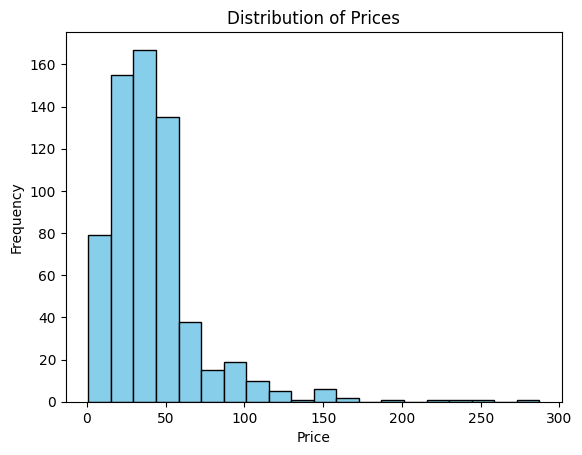

In [8]:
import matplotlib.pyplot as plt
plt.hist(Amazon_books['price'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Prices')
plt.show()

From the histogram we can see the mean will not be appropriate to fill in missing values so we use the median

In [9]:
median = Amazon_books['price'].median()
Amazon_books['price'].fillna(median, inplace=True)

In [10]:
Amazon_books.isna().sum()

title                             0
author                          142
price                             0
price (including used books)     65
pages                            44
avg_reviews                       0
n_reviews                         0
star5                             0
star4                            67
star3                           148
star2                           251
star1                           374
dimensions                      109
weight                          118
language                         37
publisher                        74
ISBN_13                         105
link                              0
complete_link                     0
dtype: int64

In [11]:
Amazon_books.info()

<class 'pandas.core.frame.DataFrame'>
Index: 702 entries, 0 to 829
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         702 non-null    object 
 1   author                        560 non-null    object 
 2   price                         702 non-null    float64
 3   price (including used books)  637 non-null    object 
 4   pages                         658 non-null    object 
 5   avg_reviews                   702 non-null    float64
 6   n_reviews                     702 non-null    object 
 7   star5                         702 non-null    object 
 8   star4                         635 non-null    object 
 9   star3                         554 non-null    object 
 10  star2                         451 non-null    object 
 11  star1                         328 non-null    object 
 12  dimensions                    593 non-null    object 
 13  weight    

In [12]:
Amazon_books['n_reviews'] = Amazon_books['n_reviews'].str.replace(',', '').astype(float)
Amazon_books['avg_reviews'] = Amazon_books['avg_reviews'].astype(float)
non_numeric_rows = Amazon_books[Amazon_books['pages'].str.replace('.', '', 1).str.isnumeric() == False]
Amazon_books = Amazon_books.drop(non_numeric_rows.index)
Amazon_books['pages'] = Amazon_books['pages'].astype(float)

# Exploratory Data Analysis

# How much do they cost

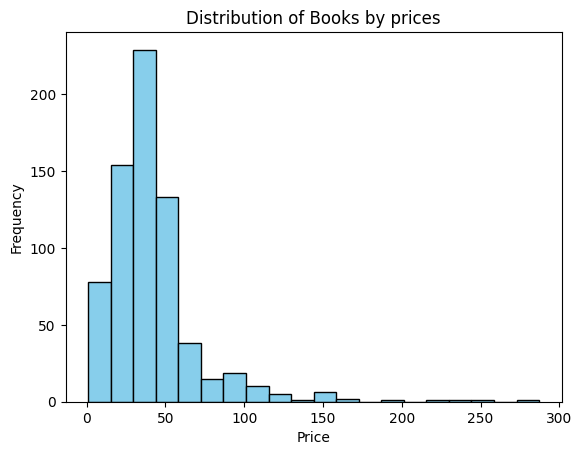

In [13]:
import matplotlib.pyplot as plt
plt.hist(Amazon_books['price'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Books by prices')
plt.show()

We can see majority of the books cost **less than $50**.

A bang for your buck if you ask me.

In [14]:
Amazon_books['price'].mean()

41.6778417266187

price vs reviews

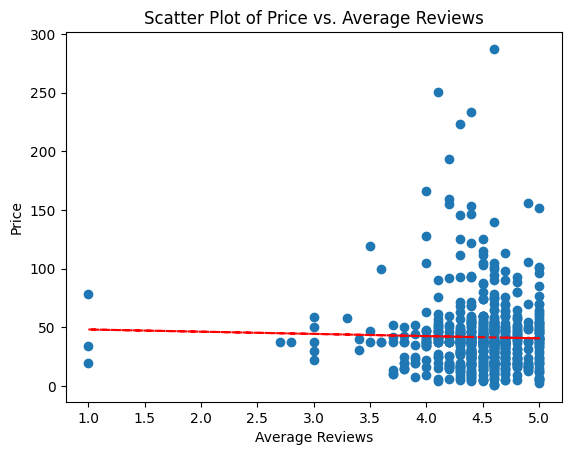

In [15]:
import matplotlib.pyplot as plt
plt.scatter(Amazon_books['avg_reviews'],Amazon_books['price'])
plt.ylabel('Price')
plt.xlabel('Average Reviews')
plt.title('Scatter Plot of Price vs. Average Reviews')
coef = np.polyfit(Amazon_books['avg_reviews'],Amazon_books['price'],1)
trendline = np.poly1d(coef)
plt.plot(Amazon_books['avg_reviews'],trendline(Amazon_books['avg_reviews']),"r--")
plt.show()

No clear relationship between price and review

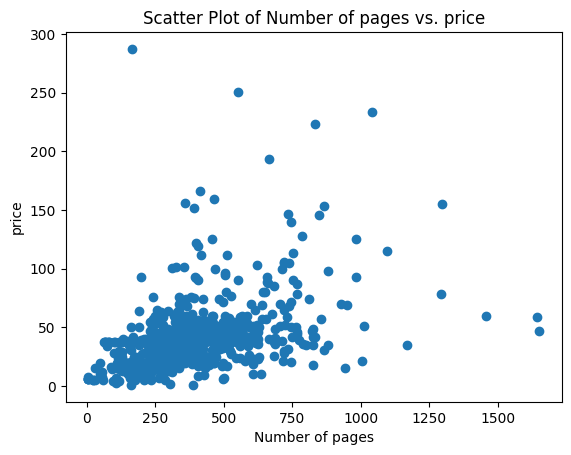

In [16]:
# Scatter plot
plt.scatter(Amazon_books['pages'], Amazon_books['price'])
plt.ylabel('price')
plt.xlabel('Number of pages')
plt.title('Scatter Plot of Number of pages vs. price')
plt.show()

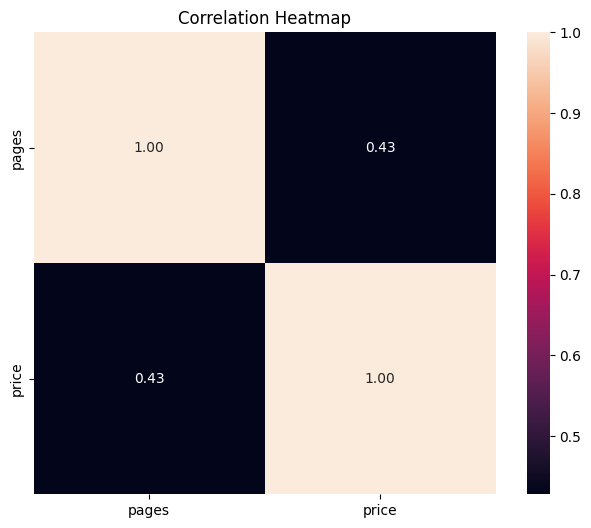

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt  # Import matplotlib for customization

# Calculate the correlation matrix
correlation_matrix = Amazon_books[['pages', 'price']].corr()

# Create a heatmap with labels
plt.figure(figsize=(8, 6))  # Set the figure size
sns.heatmap(
    correlation_matrix,
    annot=True,                     
    fmt=".2f",               
    cbar=True,               
    square=True,                      
)
plt.title('Correlation Heatmap')  # Add a title to the plot
plt.show()

We can see there is a moderately positive correlation between number of pages and book prices (0.43) i.e (The more pages a book has the higher the chances it costs more)

# Best python books

In [18]:
python_books = Amazon_books[Amazon_books['title'].str.contains('python', case=False)]
display(python_books.nlargest(10,['n_reviews','avg_reviews']))

,title,author,price,price (including used books),pages,avg_reviews,n_reviews,star5,star4,star3,star2,star1,dimensions,weight,language,publisher,ISBN_13,link,complete_link
22,Monty Python and the Holy Grail (Special Edition),NaN,9.99,9.99,NaN,4.7,10103.0,85%,8%,3%,1%,2%,7.5 x 5.5 x 0.5 inches; 3.2 Ounces,NaN,"Unqualified, Japanese (Dolby Digital 2.0 Mono), English (Dolby Digital 5.1), English (Dolby Digi...",NaN,NaN,/Monty-Python-Holy-Grail-Special/dp/B00005O3VC/ref=sr_1_57?keywords=python&qid=1671164641&sr=8-57,https://www.amazon.com/Monty-Python-Holy-Grail-Special/dp/B00005O3VC/ref=sr_1_57?keywords=python...
633,"Python Crash Course, 2nd Edition: A Hands-On, Project-Based Introduction to Programming",[ Eric Matthes],23.99,23.99,544.0,4.7,7767.0,81%,13%,4%,1%,1%,NaN,NaN,"""Brilliant.""","No Starch Press; 2nd edition (May 21, 2019)",NaN,/Python-Crash-Course-Eric-Matthes-ebook/dp/B07J4521M3/ref=sxin_24_sbl_swi?content-id=amzn1.sym.6...,https://www.amazon.com/Python-Crash-Course-Eric-Matthes-ebook/dp/B07J4521M3/ref=sxin_24_sbl_swi?...
394,Python: - The Bible- 3 Manuscripts in 1 book: -Python Programming For Beginners -Python Programm...,NaN,27.97,27.97,375.0,4.3,4228.0,64%,16%,10%,4%,6%,6 x 0.85 x 9 inches,1.11 pounds,English,"Independently published (April 28, 2018)",978-1980953906,/gp/slredirect/picassoRedirect.html/ref=pa_sp_mtf_aps_sr_pg1_1?ie=UTF8&adId=A0448966233L01UDEIC9...,https://www.amazon.com/gp/slredirect/picassoRedirect.html/ref=pa_sp_mtf_aps_sr_pg1_1?ie=UTF8&adI...
528,Monty Python's Life Of Brian - The Immaculate Edition [Blu-ray],NaN,9.48,9.48,NaN,4.8,3678.0,86%,9%,4%,1%,NaN,6.75 x 5 x 0.25 inches; 1.6 Ounces,NaN,NaN,NaN,NaN,/Monty-Pythons-Life-Brian-Immaculate/dp/B000VECAC6/ref=sr_1_297?keywords=python&qid=1671164946&s...,https://www.amazon.com/Monty-Pythons-Life-Brian-Immaculate/dp/B000VECAC6/ref=sr_1_297?keywords=p...
569,Monty Python's Life Of Brian [DVD],NaN,18.85,18.85,NaN,4.8,3678.0,86%,9%,4%,1%,NaN,7.5 x 5.38 x 0.6 inches; 4 Ounces,NaN,English (Dolby Digital 2.0 Mono),NaN,NaN,/Monty-Pythons-Brian-Graham-Chapman/dp/6305388458/ref=sr_1_206?keywords=python&qid=1671164927&sr...,https://www.amazon.com/Monty-Pythons-Brian-Graham-Chapman/dp/6305388458/ref=sr_1_206?keywords=py...
582,Monty Python's The Meaning of Life [Blu-ray],NaN,9.99,9.99,NaN,4.7,3337.0,82%,10%,4%,2%,2%,6.75 x 5.3 x 0.35 inches; 2.4 Ounces,NaN,"English (DTS-HD Master Audio 5.1), French (DTS-HD 2.0)",NaN,NaN,/Monty-Pythons-Meaning-Life-Blu-ray/dp/B07G24KRCL/ref=sr_1_166?keywords=python&qid=1671164918&sr...,https://www.amazon.com/Monty-Pythons-Meaning-Life-Blu-ray/dp/B07G24KRCL/ref=sr_1_166?keywords=py...
532,Python: For Beginners: A Crash Course Guide To Learn Python in 1 Week,[ Timothy C. Needham],13.66,13.66,135.0,4.3,3142.0,66%,16%,10%,3%,5%,6 x 0.31 x 9 inches,6.7 ounces,English,"Independently published (September 21, 2017)",66,/gp/slredirect/picassoRedirect.html/ref=pa_sp_atf_next_aps_sr_pg7_1?ie=UTF8&adId=A03626981KEAHR6...,https://www.amazon.com/gp/slredirect/picassoRedirect.html/ref=pa_sp_atf_next_aps_sr_pg7_1?ie=UTF...
61,"Automate the Boring Stuff with Python, 2nd Edition: Practical Programming for Total Beginners",[ Al Sweigart],26.49,26.49,592.0,4.7,2672.0,82%,12%,3%,1%,1%,7 x 1.31 x 9.31 inches,3.53 ounces,English,"No Starch Press; 2nd edition (November 12, 2019)",-34%,/Automate-Boring-Stuff-Python-2nd/dp/1593279922/ref=sr_1_86?keywords=data+analysis&qid=167116465...,https://www.amazon.com/Automate-Boring-Stuff-Python-2nd/dp/1593279922/ref=sr_1_86?keywords=data+...
32,Python for Everybody: Exploring Data in Python 3,"[ Charles R. Severance, Aimee Andrion, et al.]",0.99,0.99,387.0,4.6,2568.0,76%,16%,5%,2%,2%,NaN,NaN,English,NaN,NaN,/Python-Everybody-Exploring-Data-ebook/dp/B01IA5VIFM/ref=sr_1_44?keywords=python&qid=1671164641&...,https://www.amazon.com/Python-Everybody-Exploring-Data-ebook/dp/B01IA5VIFM/ref=sr_1_44?keywords=...
629,Learning Python: Powerful Object-Oriented Programming,NaN,46.99,16.57 - 46.99,1650.0,4.5,1724.0,74%,14%

### **This looks good except monty python and the holy grail isn't a book!!**

In [19]:
# Create a boolean mask where 'title' contains the string to remove
remove_monty = python_books['title'].str.contains("monty python", case=False)

# Use the mask to filter the DataFrame and keep only rows that do not contain the string
python_books = python_books[~remove_monty]
display(python_books.nlargest(10,['n_reviews','avg_reviews']))

,title,author,price,price (including used books),pages,avg_reviews,n_reviews,star5,star4,star3,star2,star1,dimensions,weight,language,publisher,ISBN_13,link,complete_link
633,"Python Crash Course, 2nd Edition: A Hands-On, Project-Based Introduction to Programming",[ Eric Matthes],23.99,23.99,544.0,4.7,7767.0,81%,13%,4%,1%,1%,NaN,NaN,"""Brilliant.""","No Starch Press; 2nd edition (May 21, 2019)",NaN,/Python-Crash-Course-Eric-Matthes-ebook/dp/B07J4521M3/ref=sxin_24_sbl_swi?content-id=amzn1.sym.6...,https://www.amazon.com/Python-Crash-Course-Eric-Matthes-ebook/dp/B07J4521M3/ref=sxin_24_sbl_swi?...
394,Python: - The Bible- 3 Manuscripts in 1 book: -Python Programming For Beginners -Python Programm...,NaN,27.97,27.97,375.0,4.3,4228.0,64%,16%,10%,4%,6%,6 x 0.85 x 9 inches,1.11 pounds,English,"Independently published (April 28, 2018)",978-1980953906,/gp/slredirect/picassoRedirect.html/ref=pa_sp_mtf_aps_sr_pg1_1?ie=UTF8&adId=A0448966233L01UDEIC9...,https://www.amazon.com/gp/slredirect/picassoRedirect.html/ref=pa_sp_mtf_aps_sr_pg1_1?ie=UTF8&adI...
532,Python: For Beginners: A Crash Course Guide To Learn Python in 1 Week,[ Timothy C. Needham],13.66,13.66,135.0,4.3,3142.0,66%,16%,10%,3%,5%,6 x 0.31 x 9 inches,6.7 ounces,English,"Independently published (September 21, 2017)",66,/gp/slredirect/picassoRedirect.html/ref=pa_sp_atf_next_aps_sr_pg7_1?ie=UTF8&adId=A03626981KEAHR6...,https://www.amazon.com/gp/slredirect/picassoRedirect.html/ref=pa_sp_atf_next_aps_sr_pg7_1?ie=UTF...
61,"Automate the Boring Stuff with Python, 2nd Edition: Practical Programming for Total Beginners",[ Al Sweigart],26.49,26.49,592.0,4.7,2672.0,82%,12%,3%,1%,1%,7 x 1.31 x 9.31 inches,3.53 ounces,English,"No Starch Press; 2nd edition (November 12, 2019)",-34%,/Automate-Boring-Stuff-Python-2nd/dp/1593279922/ref=sr_1_86?keywords=data+analysis&qid=167116465...,https://www.amazon.com/Automate-Boring-Stuff-Python-2nd/dp/1593279922/ref=sr_1_86?keywords=data+...
32,Python for Everybody: Exploring Data in Python 3,"[ Charles R. Severance, Aimee Andrion, et al.]",0.99,0.99,387.0,4.6,2568.0,76%,16%,5%,2%,2%,NaN,NaN,English,NaN,NaN,/Python-Everybody-Exploring-Data-ebook/dp/B01IA5VIFM/ref=sr_1_44?keywords=python&qid=1671164641&...,https://www.amazon.com/Python-Everybody-Exploring-Data-ebook/dp/B01IA5VIFM/ref=sr_1_44?keywords=...
629,Learning Python: Powerful Object-Oriented Programming,NaN,46.99,16.57 - 46.99,1650.0,4.5,1724.0,74%,14%,7%,3%,3%,NaN,NaN,English,"O'Reilly Media; 5th edition (June 12, 2013)",Python,/Learning-Python-Powerful-Object-Oriented-Programming-ebook/dp/B00DDZPC9S/ref=sxin_24_sbl_swi?co...,https://www.amazon.com/Learning-Python-Powerful-Object-Oriented-Programming-ebook/dp/B00DDZPC9S/...
630,"Learning Python, 5th Edition",NaN,58.55,21.53 - 58.55,1643.0,4.5,1724.0,74%,14%,7%,3%,3%,7 x 2.8 x 9.19 inches,4.95 pounds,English,"O'Reilly Media; Fifth edition (July 30, 2013)",,/Learning-Python-5th-Mark-Lutz/dp/1449355730/ref=sxin_24_sbl_swi?content-id=amzn1.sym.6ca367be-6...,https://www.amazon.com/Learning-Python-5th-Mark-Lutz/dp/1449355730/ref=sxin_24_sbl_swi?content-i...
3,"Python for Data Analysis: Data Wrangling with Pandas, NumPy, and IPython",[ William McKinney],53.99,53.99,547.0,4.6,1686.0,75%,16%,5%,2%,2%,7 x 1.11 x 9.19 inches,1.47 pounds,English,"O'Reilly Media; 2nd edition (November 14, 2017)",978-1491957660,/Python-Data-Analysis-Wrangling-IPython/dp/1491957662/ref=sr_1_11?keywords=data+analysis&qid=167...,https://www.amazon.com/Python-Data-Analysis-Wrangling-IPython/dp/1491957662/ref=sr_1_11?keywords...
381,Python (2nd Edition): Learn Python in One Day and Learn It Well. Python for Beginners with Hands...,NaN,37.49,NaN,175.0,4.5,1542.0,69%,19%,9%,2%,2%,NaN,NaN,"Concepts are presented in a ""to-the-point"" style to cater to the busy individual. With this book...","Learn Coding Fast; 2nd edition (May 10, 2017)",NaN,/Python-2nd-Beginners-Hands-Project-ebook/dp/B071Z2Q6TQ/ref=sr_1_25?keywords=python&qid=16711646...,https://www.amazon.com/Python-2nd-Beginners-Han

### Much better 
The best book for python is **Python Crash Course, 2nd Edition: A Hands-On, Project-Based Introduction to Programming**

* My reccomendation would be **Python for Data Analysis: Data Wrangling with Pandas, NumPy, and IPython, sinne i've used it.**

# Best book for ML

In [20]:
ml_books = Amazon_books[Amazon_books['title'].str.contains(r'deep learning|machine learning|computer vision|nlp', case=False, regex=True)]
display(ml_books.nlargest(10,['n_reviews','avg_reviews']))

,title,author,price,price (including used books),pages,avg_reviews,n_reviews,star5,star4,star3,star2,star1,dimensions,weight,language,publisher,ISBN_13,link,complete_link
478,"Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools, and Techniq...",[ Aurélien Géron],57.49,57.49,856.0,4.8,3129.0,85%,10%,3%,1%,2%,7 x 1.2 x 9.2 inches,2.8 pounds,English,"O'Reilly Media; 2nd edition (October 15, 2019)",978-1492032649,/Hands-Machine-Learning-Scikit-Learn-TensorFlow/dp/1492032646/ref=sr_1_234?keywords=python&qid=1...,https://www.amazon.com/Hands-Machine-Learning-Scikit-Learn-TensorFlow/dp/1492032646/ref=sr_1_234...
420,Deep Learning with Python,"[ Francois Chollet, Mark Thomas, et al.]",37.49,NaN,NaN,4.5,1374.0,76%,13%,4%,2%,5%,NaN,NaN,NaN,NaN,NaN,/Deep-Learning-with-Python-audiobook/dp/B07H5RKKB6/ref=sr_1_150?keywords=python&qid=1671164909&s...,https://www.amazon.com/Deep-Learning-with-Python-audiobook/dp/B07H5RKKB6/ref=sr_1_150?keywords=p...
701,"Machine Learning For Absolute Beginners: A Plain English Introduction (Second Edition) (AI, Data...",NaN,37.49,NaN,167.0,4.5,1123.0,68%,18%,8%,3%,2%,NaN,NaN,English,"Scatterplot Press; 2nd edition (June 21, 2017)",NaN,/Machine-Learning-Absolute-Beginners-Introduction-ebook/dp/B07335JNW1/ref=sr_1_189?crid=1IWIG31D...,https://www.amazon.com/Machine-Learning-Absolute-Beginners-Introduction-ebook/dp/B07335JNW1/ref=...
717,The Hundred-Page Machine Learning Book,[ Andriy Burkov],31.99,26.50 - 31.99,160.0,4.6,839.0,80%,10%,4%,2%,3%,7.5 x 0.38 x 9.25 inches,13.8 ounces,English,"Andriy Burkov (January 13, 2019)",978-1999579500,/Hundred-Page-Machine-Learning-Book/dp/199957950X/ref=sr_1_244?crid=1IWIG31DNPO6P&keywords=data+...,https://www.amazon.com/Hundred-Page-Machine-Learning-Book/dp/199957950X/ref=sr_1_244?crid=1IWIG3...
720,Pattern Recognition and Machine Learning (Information Science and Statistics),[ Christopher M. Bishop],105.22,90.99 - 105.22,738.0,4.6,687.0,76%,13%,6%,3%,2%,7.7 x 1.3 x 10.2 inches,4.73 pounds,English,"Springer (August 17, 2006)",978-0387310732,/Pattern-Recognition-Learning-Information-Statistics/dp/0387310738/ref=sr_1_238?crid=1IWIG31DNPO...,https://www.amazon.com/Pattern-Recognition-Learning-Information-Statistics/dp/0387310738/ref=sr_...
678,Mathematics for Machine Learning,NaN,48.99,48.99,398.0,4.7,608.0,80%,13%,3%,2%,2%,7 x 0.92 x 10 inches,1.76 pounds,English,"Cambridge University Press; 1st edition (April 23, 2020)",978-1108455145,/Mathematics-Machine-Learning-Peter-Deisenroth/dp/110845514X/ref=sr_1_148?crid=1IWIG31DNPO6P&key...,https://www.amazon.com/Mathematics-Machine-Learning-Peter-Deisenroth/dp/110845514X/ref=sr_1_148?...
591,Introduction to Machine Learning with Python: A Guide for Data Scientists,NaN,49.35,29.76 - 49.35,398.0,4.5,591.0,75%,15%,3%,3%,5%,7 x 0.82 x 9.19 inches,1.3 pounds,English,"O'Reilly Media; 1st edition (November 15, 2016)",978-1449369415,/Introduction-Machine-Learning-Python-Scientists/dp/1449369413/ref=sr_1_127?keywords=python&qid=...,https://www.amazon.com/Introduction-Machine-Learning-Python-Scientists/dp/1449369413/ref=sr_1_12...
51,Machine Learning: 4 Books in 1: The #1 Beginner's Guide to Master the Basics of Python Programmi...,"[ Andrew Park, and , Russell Newton]",37.49,NaN,NaN,4.7,290.0,83%,10%,3%,1%,3%,NaN,NaN,NaN,NaN,NaN,/Data-Science-Beginners-Programming-Learning/dp/B0869Q3Z3H/ref=sr_1_94?keywords=data+analysis&qi...,https://www.amazon.com/Data-Science-Beginners-Programming-Learning/dp/B0869Q3Z3H/ref=sr_1_94?key...
241,"PYTHON: Learn Coding Programs with Python Programming and Master Data Analysis & Analytics, Data...",[ TechExp Academy],24.90,19.66 - 24.90,400.0,4.1,273.0,60%,15%,12%,5%,8%,8 x 0.91 x 10 inches,1.9 pounds,English,"Independently published (December 24, 2021)",,/PYTHON-Programming-Analytics-Beginners-Manuscripts/dp/B09NT7WVT5/ref=sr_1_202?keywords=data+ana...,https://www.amazon.com/PYTHON-Programming-Analytics-Beginners-Manuscripts/dp/B09NT7WVT5/ref=sr_1...
477,Ultimate Step by Step G

# Most expensive Books And Their Publishers


In [21]:
publisher_prices = Amazon_books.groupby('publisher')[['price','title','avg_reviews','n_reviews']].max()
top_10_publishers_by_price = publisher_prices.sort_values('price',ascending=False).head(10)
display(top_10_publishers_by_price)

,price,title,avg_reviews,n_reviews
publisher,,,,
"National Science Teachers Association - NSTA Press (November 15, 2013)",287.14,The Basics of Data Literacy: Helping Your Students (And You!) Make Sense of Data - PB343X,4.6,6.0
"Pearson; 5th edition (January 18, 2012)",250.63,"Statistics, Data Analysis, and Decision Modeling",4.1,82.0
"Swedish Pharmaceutical Press; 5th edition (January 26, 2017)",233.60,"Pharmacokinetic and Pharmacodynamic Data Analysis: Concepts and Applications, Second Edition",4.4,14.0
"Pearson; 11th edition (February 11, 2019)",223.00,"Analytics, Data Science, & Artificial Intelligence: Systems for Decision Support",4.3,36.0
"Pearson; 4th edition (June 13, 2013)",193.32,Data Structures & Algorithm Analysis in C++,4.2,93.0
"Springer; 1st ed. 2021 edition (October 3, 2021)",165.80,Cybersecurity Data Science: Best Practices in an Emerging Profession,4.0,1.0
"Artech House (October 31, 2019)",159.00,Introduction to Radar With Python and Matlab,4.2,12.0
"Wiley-Interscience; 1st edition (April 7, 2006)",155.57,Longitudinal Data Analysis,4.9,8.0
"Cengage Learning; 7th edition (June 11, 2015)",154.94,An Introduction to Statistical Methods and Data Analysis,4.2,165.0
